In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.losses import mse, binary_crossentropy, kl_divergence
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale


import numpy as np
import pandas as pd

2024-07-23 00:01:21.576978: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9360] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-23 00:01:21.577035: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-23 00:01:21.577073: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1537] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-23 00:01:21.584939: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [4]:
df = pd.read_csv('/home/work/gnssl/kddcup.data', header=None)

feature_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in",
    "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations",
    "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login",
    "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
    "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"
]

# Rename the columns of the DataFrame
df.columns = feature_names

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
df['label']

0          normal.
1          normal.
2          normal.
3          normal.
4          normal.
            ...   
4898426    normal.
4898427    normal.
4898428    normal.
4898429    normal.
4898430    normal.
Name: label, Length: 4898431, dtype: object

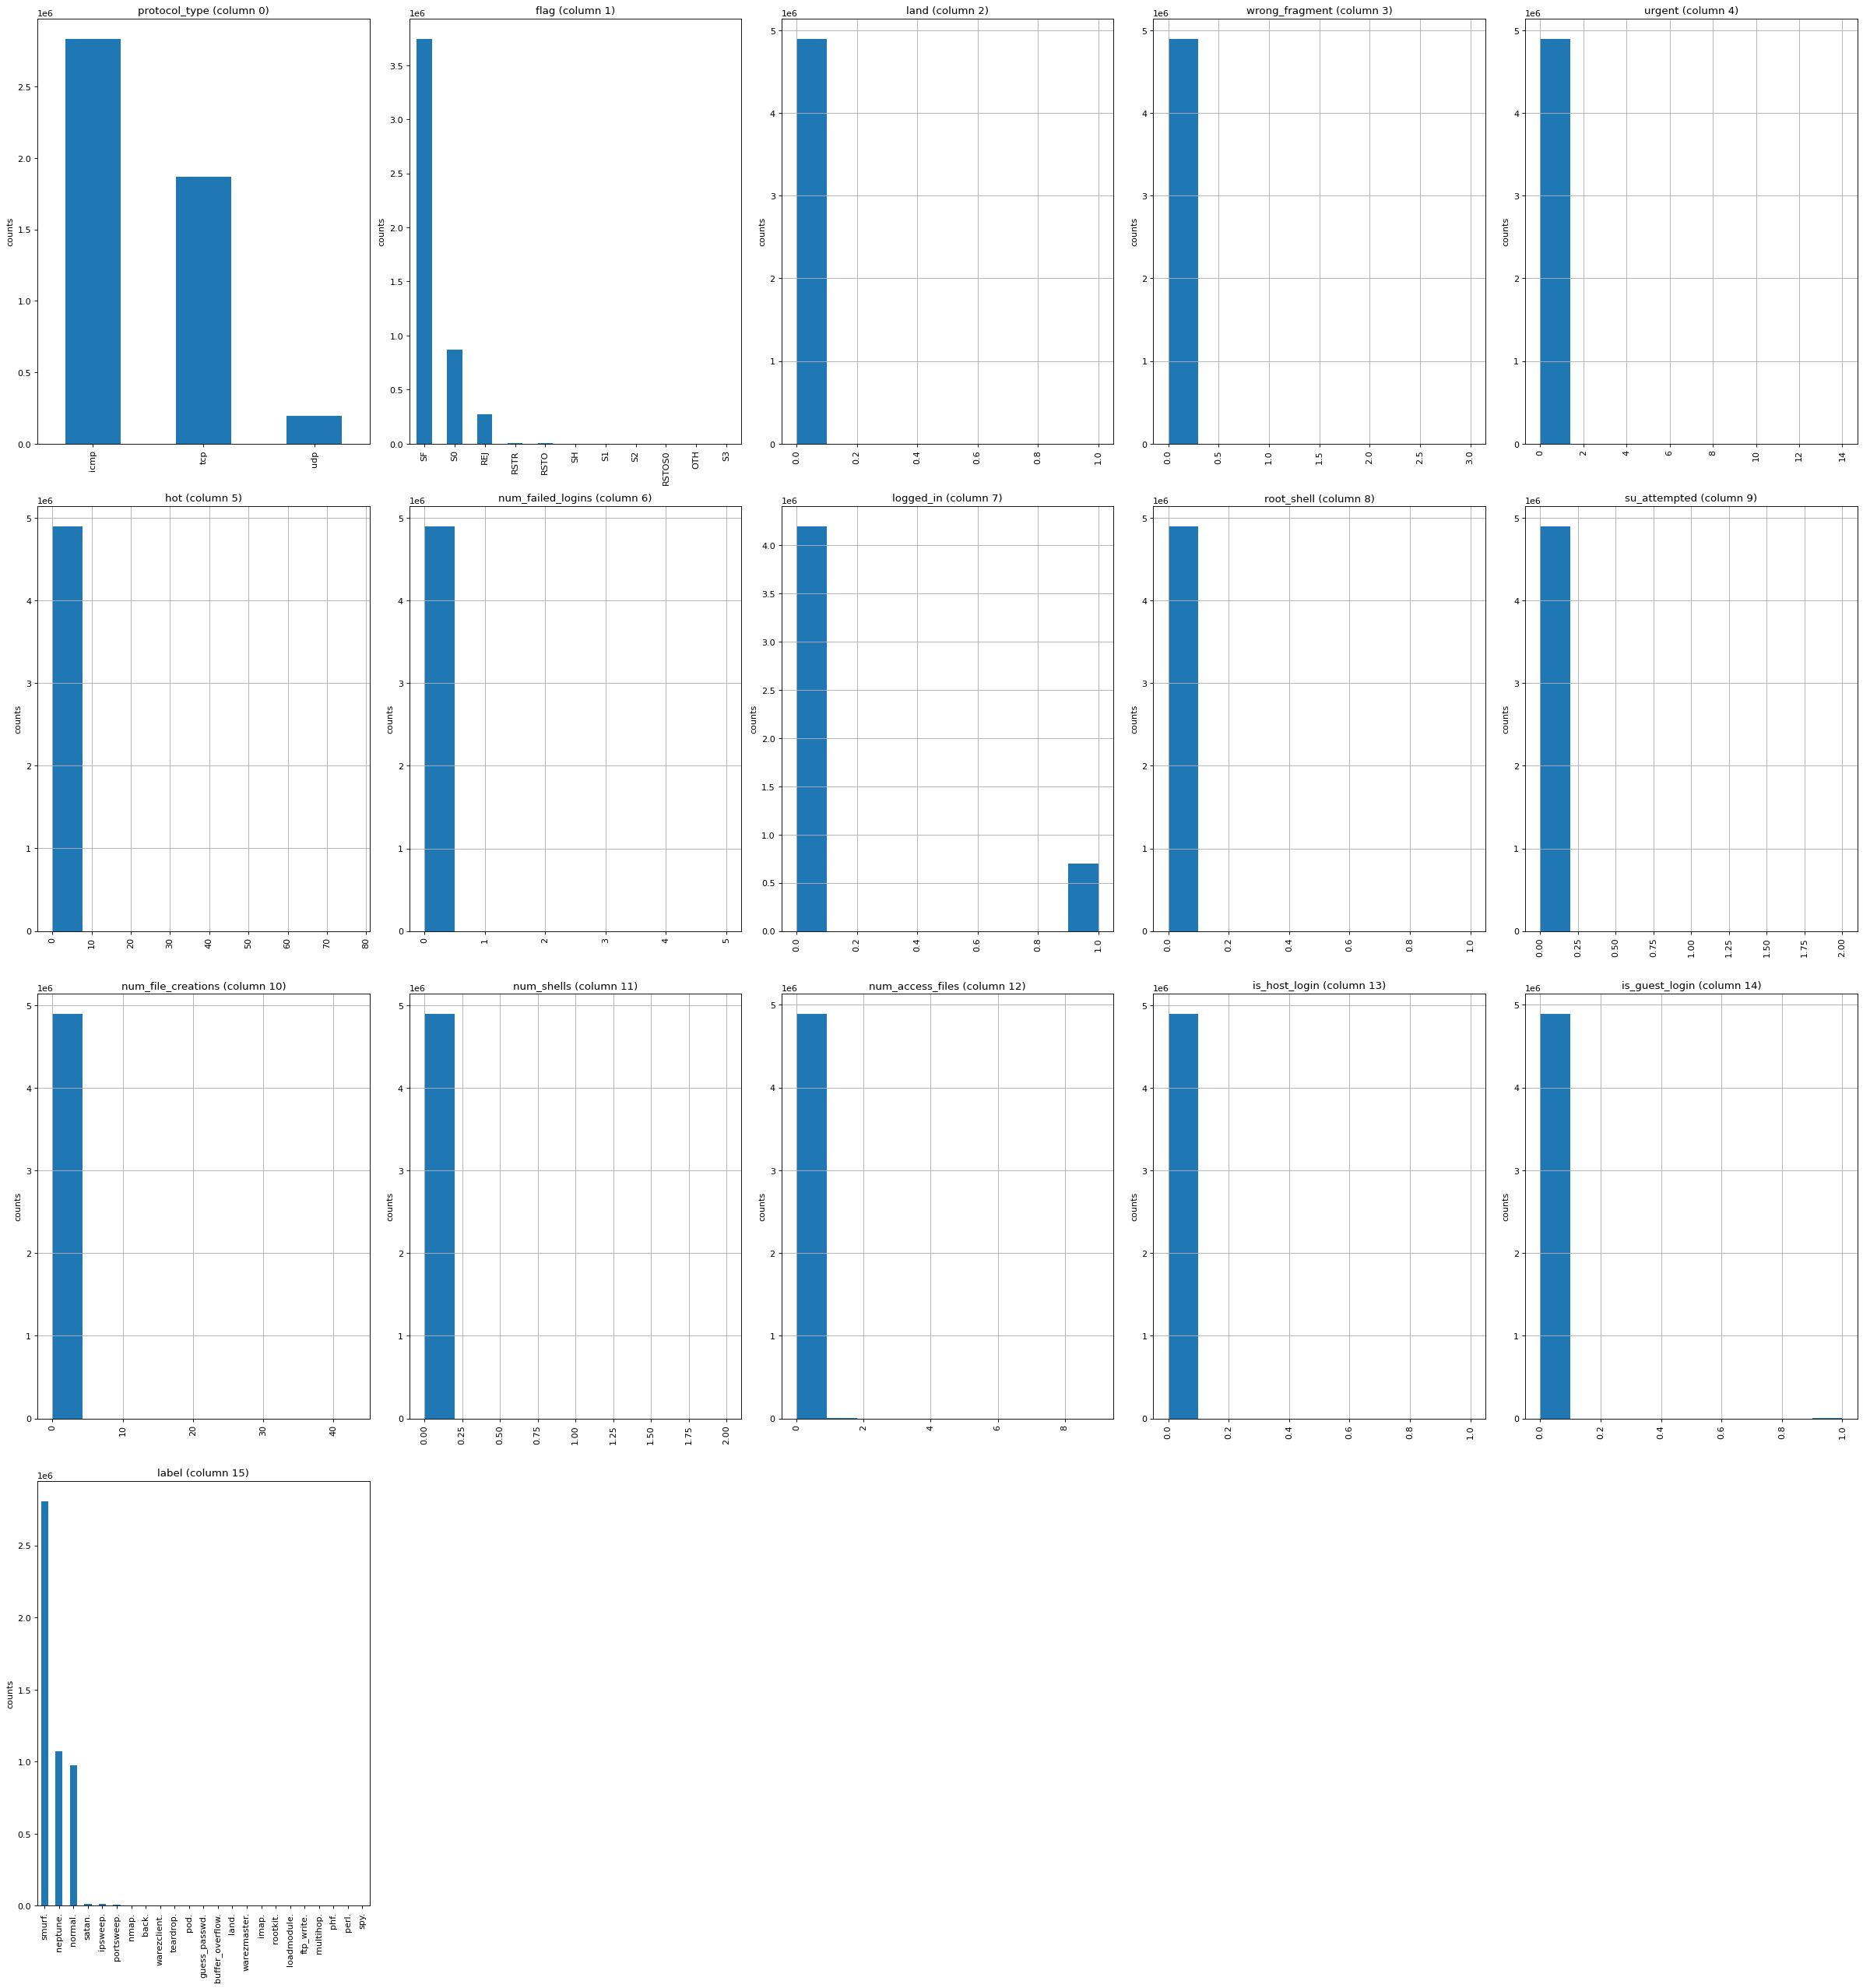

In [6]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
    
    
plotPerColumnDistribution(df, 79, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898431 entries, 0 to 4898430
Data columns (total 42 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   duration                     int64  
 1   protocol_type                object 
 2   service                      object 
 3   flag                         object 
 4   src_bytes                    int64  
 5   dst_bytes                    int64  
 6   land                         int64  
 7   wrong_fragment               int64  
 8   urgent                       int64  
 9   hot                          int64  
 10  num_failed_logins            int64  
 11  logged_in                    int64  
 12  num_compromised              int64  
 13  root_shell                   int64  
 14  su_attempted                 int64  
 15  num_root                     int64  
 16  num_file_creations           int64  
 17  num_shells                   int64  
 18  num_access_files             int64  
 19  

In [8]:
df_normal = df.loc[df['label']=='normal.']
df_attack = df.loc[df['label']!='normal.']

normal_df_train = df.loc[df['label']=='normal.']
normal_df_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898426,0,tcp,http,SF,212,2288,0,0,0,0,...,255,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.
4898427,0,tcp,http,SF,219,236,0,0,0,0,...,255,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.
4898428,0,tcp,http,SF,218,3610,0,0,0,0,...,255,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.
4898429,0,tcp,http,SF,219,1234,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.


In [9]:
# 'label' 열의 값이 'normal.'이면 0으로, 'normal.'이 아니면 1로 변경
df['label'] = df['label'].apply(lambda x: 0 if x == 'normal.' else 1)

# 변경된 데이터프레임 확인
print(df.head())

   duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        215      45076     0   
1         0           tcp    http   SF        162       4528     0   
2         0           tcp    http   SF        236       1228     0   
3         0           tcp    http   SF        233       2032     0   
4         0           tcp    http   SF        239        486     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   0   
1               0       0    0  ...                   1   
2               0       0    0  ...                   2   
3               0       0    0  ...                   3   
4               0       0    0  ...                   4   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     0.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3           

In [10]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding 적용
label_encoder = LabelEncoder()
df['protocol_type'] = label_encoder.fit_transform(df['protocol_type'])
df['service'] = label_encoder.fit_transform(df['service'])
df['flag'] = label_encoder.fit_transform(df['flag'])

# 인코딩된 데이터프레임 확인
print(df.head())

   duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       24     9        215      45076     0   
1         0              1       24     9        162       4528     0   
2         0              1       24     9        236       1228     0   
3         0              1       24     9        233       2032     0   
4         0              1       24     9        239        486     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   0   
1               0       0    0  ...                   1   
2               0       0    0  ...                   2   
3               0       0    0  ...                   3   
4               0       0    0  ...                   4   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     0.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0

In [11]:
columns_list = ['flag', 'count', 'srv_count', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'label']
df=df[columns_list]


In [12]:
df.shape

(4898431, 9)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.1, random_state=42)
X_train.shape, X_test.shape

((4408587, 9), (489844, 9))

In [14]:
X_train['label'].value_counts()

1    3533113
0     875474
Name: label, dtype: int64

In [15]:
normal = X_train[X_train['label'] == 0]
normal.shape

(875474, 9)

In [16]:
y_train = normal['label']
X_train_normal = normal.drop(labels='label', axis=1)

y_test = X_test['label']
X_test_normal = X_test.drop(labels='label', axis=1)

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train_normal)
scaler.fit(X_test_normal)

X_train_ft = scaler.transform(X_train_normal)
X_test = scaler.transform(X_test_normal)

In [18]:
#reshape inputs for LSTM [samples, timesteps, features]

X_train_ft = X_train_ft.reshape(X_train_ft.shape[0], 1, X_train_ft.shape[1])
print("Training data shape:", X_train_ft.shape)

X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print("Test data shape:", X_test.shape)


Training data shape: (875474, 1, 8)
Test data shape: (489844, 1, 8)


In [19]:
X_train_ft.shape, X_test.shape

((875474, 1, 8), (489844, 1, 8))

In [20]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector, Conv1D, Conv1DTranspose
from keras.models import Model
from keras import regularizers
from keras_self_attention import SeqWeightedAttention, SeqSelfAttention

In [21]:
'''latent_dim = 2
inter_dim = 3
def sampling(args):
    z_mean, z_log_sigma = args
    batch_size = tf.shape(z_mean)[0] 
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.)
    return z_mean + z_log_sigma * epsilon

def vae_loss(x, x_decoded_mean):
    # compute the average MSE error, then scale it up, ie. simply sum on all axes
    reconstruction_loss = K.sum(K.square(x - x_decoded_mean))
	
    # compute the KL loss
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.square(K.exp(z_log_var)), axis=-1)
	
    # return the average loss over all 
    total_loss = K.mean(reconstruction_loss + kl_loss)        
    return total_loss

def cvae(X):
    
    timesteps,features = X.shape[1], X.shape[2]
    input_x = Input(shape=(timesteps, features), name='InputTimeSeries') 

    #intermediate dimension 
    h = Conv1D(filters=48, kernel_size=5, padding="same", strides=1, activation="relu")(input_x)
    h = Conv1D(filters=32, kernel_size=5, padding="same", strides=1)(h)
    h = Conv1D(filters=16, kernel_size=5, padding="same", strides=1)(h)
    h = LSTM(inter_dim, activation='relu', return_sequences=True)(h)
    h = SeqSelfAttention(attention_activation='sigmoid')(h)
    h = LSTM(inter_dim, activation='relu', return_sequences=False)(h)
    h = Dense(inter_dim, activation='relu')(h)
    h = Dense(inter_dim, activation='relu')(h)

    #z_layer
    z_mean = Dense(latent_dim)(h)
    z_log_sigma = Dense(latent_dim)(h)
    z = Lambda(sampling)([z_mean, z_log_sigma])

    # Reconstruction decoder
    decoder1 = RepeatVector(timesteps)(z)
    decoder1 = Dense(inter_dim, activation='relu')(decoder1)
    decoder1 = Dense(inter_dim, activation='relu')(decoder1)
    decoder1 = LSTM(inter_dim, activation='relu', return_sequences=True)(decoder1)
    decoder1 = LSTM(inter_dim, activation='relu', return_sequences=True)(decoder1)
    decoder1 = SeqSelfAttention(attention_activation='sigmoid')(decoder1)
    decoder1 = Conv1DTranspose(filters=16, kernel_size=5, padding="same", strides=1, activation="relu")(decoder1)
    decoder1 = Conv1DTranspose(filters=32, kernel_size=5, padding="same", strides=1, activation="relu")(decoder1)
    decoder1 = Conv1DTranspose(filters=48, kernel_size=5, padding="same", strides=1, activation="relu")(decoder1)
    decoder1 = TimeDistributed(Dense(features))(decoder1)
    model = Model(input_x, decoder1)
    return model

model = cvae(X_train_ft)
model.compile(optimizer='adam', loss=vae_loss, metrics=['accuracy'])

    
model.summary()

history = model.fit(X_train_ft, X_train_ft,
                        shuffle=True,
                        epochs=100,
                        validation_data =(X_train, X_train),                        
                        batch_size=256)
'''
latent_dim = 2
inter_dim = 3
def sampling(args):
    z_mean, z_log_sigma = args
    batch_size = tf.shape(z_mean)[0] 
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.)
    return z_mean + z_log_sigma * epsilon

def vae_loss(x, x_decoded_mean, z_mean, z_log_sigma):
    reconstruction_loss = K.sum(K.square(x - x_decoded_mean))
    kl_loss = -0.5 * K.sum(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
    total_loss = K.mean(reconstruction_loss + kl_loss)
    return total_loss

def cvae(X):
    
    timesteps,features = X.shape[1], X.shape[2]
    input_x = Input(shape=(timesteps, features), name='InputTimeSeries') 

    #intermediate dimension 
    h = Conv1D(filters=48, kernel_size=5, padding="same", strides=1, activation="relu")(input_x)
    h = Conv1D(filters=32, kernel_size=5, padding="same", strides=1)(h)
    h = Conv1D(filters=16, kernel_size=5, padding="same", strides=1)(h)
    h = LSTM(inter_dim, activation='relu', return_sequences=True)(h)
    h = SeqSelfAttention(attention_activation='sigmoid')(h)
    h = LSTM(inter_dim, activation='relu', return_sequences=False)(h)
    h = Dense(inter_dim, activation='relu')(h)
    h = Dense(inter_dim, activation='relu')(h)

    #z_layer
    z_mean = Dense(latent_dim)(h)
    z_log_sigma = Dense(latent_dim)(h)
    z = Lambda(sampling)([z_mean, z_log_sigma])

    # Reconstruction decoder
    decoder1 = RepeatVector(timesteps)(z)
    decoder1 = Dense(inter_dim, activation='relu')(decoder1)
    decoder1 = Dense(inter_dim, activation='relu')(decoder1)
    decoder1 = LSTM(inter_dim, activation='relu', return_sequences=True)(decoder1)
    decoder1 = LSTM(inter_dim, activation='relu', return_sequences=True)(decoder1)
    decoder1 = SeqSelfAttention(attention_activation='sigmoid')(decoder1)
    decoder1 = Conv1DTranspose(filters=16, kernel_size=5, padding="same", strides=1, activation="relu")(decoder1)
    decoder1 = Conv1DTranspose(filters=32, kernel_size=5, padding="same", strides=1, activation="relu")(decoder1)
    decoder1 = Conv1DTranspose(filters=48, kernel_size=5, padding="same", strides=1, activation="relu")(decoder1)
    decoder1 = TimeDistributed(Dense(features))(decoder1)
    model = Model(input_x, decoder1)
    
    model.add_loss(vae_loss(input_x, decoder1, z_mean, z_log_sigma))
    return model

model = cvae(X_train_ft)
model.compile(optimizer='adam', metrics=['accuracy'])

    
model.summary()

history = model.fit(X_train_ft, X_train_ft,
                        shuffle=True,
                        epochs=10,
                        validation_split=0.05,                        
                        batch_size=32).history


2024-07-23 00:01:45.701994: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38698 MB memory:  -> device: 0, name: CUDA GPU, pci bus id: 0000:c8:00.0, compute capability: 8.0
2024-07-23 00:01:45.704076: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38698 MB memory:  -> device: 1, name: CUDA GPU, pci bus id: 0000:cd:00.0, compute capability: 8.0
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 InputTimeSeries (InputLaye  [(None, 1, 8)]               0         []                            
 r)                                                                                               
                                                                                                  
 conv1d (Conv1D)             (None, 1, 48)                1968      ['InputTimeSeries[0][0]']     
                                                                                                  
 conv1d_1 (Conv1D)           (None, 1, 32)                7712      ['conv1d[0][0]']              
                                                                                                  
 conv1d_2 (Conv1D)           (None, 1, 16)                2576      ['conv1d_1[0][0]']        

                                                                                                  
 tf.math.reduce_sum (TFOpLa  ()                           0         ['tf.math.square[0][0]']      
 mbda)                                                                                            
                                                                                                  
 tf.math.multiply (TFOpLamb  (None,)                      0         ['tf.math.reduce_sum_1[0][0]']
 da)                                                                                              
                                                                                                  
 tf.__operators__.add_1 (TF  (None,)                      0         ['tf.math.reduce_sum[0][0]',  
 OpLambda)                                                           'tf.math.multiply[0][0]']    
                                                                                                  
 tf.math.r

2024-07-23 00:01:52.381956: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2024-07-23 00:01:53.138242: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55dfc4825560 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-07-23 00:01:53.138274: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): CUDA GPU, Compute Capability 8.0
2024-07-23 00:01:53.138280: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): CUDA GPU, Compute Capability 8.0
2024-07-23 00:01:53.143411: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-23 00:01:53.222670: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


25991/25991 [==============================] - 507s 19ms/step - loss: 17.4118 - accuracy: 0.9694 - val_loss: 15.9521 - val_accuracy: 0.9721
Epoch 2/10
25991/25991 [==============================] - 496s 19ms/step - loss: 15.9762 - accuracy: 0.9713 - val_loss: 15.9516 - val_accuracy: 0.9721
Epoch 3/10
25991/25991 [==============================] - 497s 19ms/step - loss: 15.9764 - accuracy: 0.9713 - val_loss: 15.9532 - val_accuracy: 0.9721
Epoch 4/10
25991/25991 [==============================] - 496s 19ms/step - loss: 15.9761 - accuracy: 0.9713 - val_loss: 15.9534 - val_accuracy: 0.9721
Epoch 5/10
25991/25991 [==============================] - 497s 19ms/step - loss: 15.9759 - accuracy: 0.9713 - val_loss: 15.9583 - val_accuracy: 0.9721
Epoch 6/10
25991/25991 [==============================] - 498s 19ms/step - loss: 15.9760 - accuracy: 0.9713 - val_loss: 15.9509 - val_accuracy: 0.9721
Epoch 7/10
25991/25991 [==============================] - 495s 19ms/step - loss: 15.9761 - accuracy: 0.97

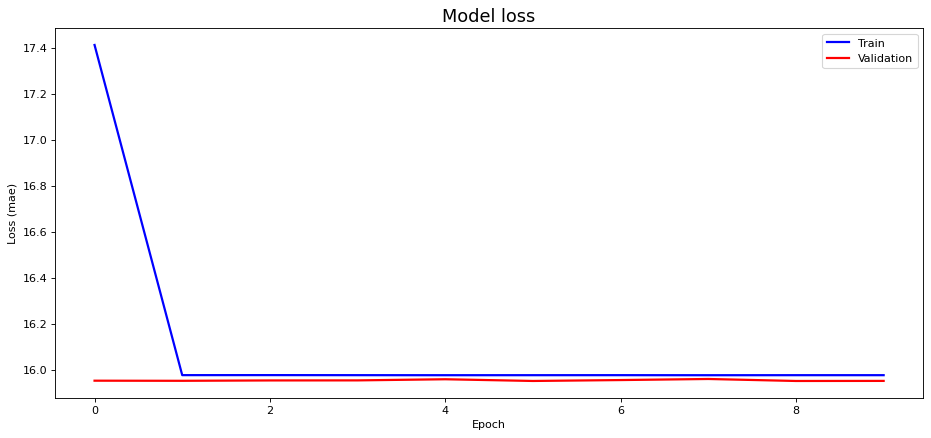

In [22]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [23]:
def flatten(X):
    flattened_X = np.empty((X.shape[0], X.shape[2]))  # sample x features array.
    for i in range(X.shape[0]):
        flattened_X[i] = X[i, (X.shape[1]-1), :]
    return(flattened_X)

In [24]:
valid_x_predictions = model.predict(X_test)
mse = np.mean(np.power(flatten(X_test) - flatten(valid_x_predictions), 2), axis=1)

error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test.tolist()})

15308/15308 [==============================] - 61s 4ms/step


In [25]:
error_df

,reconstruction_error,true_class
0,0.030351,0
1,0.364153,1
2,0.032077,0
3,0.364153,1
4,0.364153,1
...,...,...
489839,0.108270,0
489840,0.037238,0
489841,0.364153,1
489842,0.364153,1


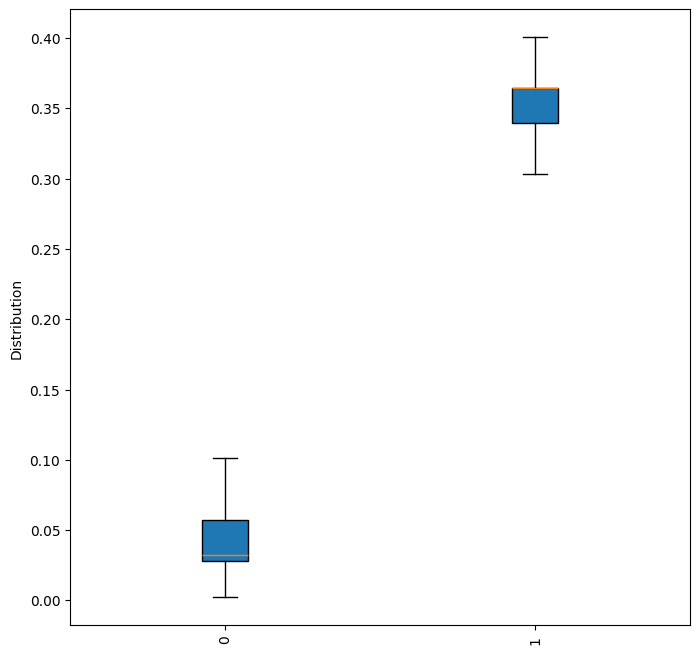

In [27]:
import matplotlib.pyplot as plt

# 데이터프레임 준비
true_class = error_df['true_class'].astype(str)
reconstruction_error = error_df['reconstruction_error']

# 박스 플롯 그리기
plt.figure(figsize=(8, 8))
plt.boxplot(
    [reconstruction_error[true_class == cls] for cls in sorted(true_class.unique())],
    labels=sorted(true_class.unique()),
    showfliers=False,
    vert=True,
    patch_artist=True
)

plt.ylabel('Distribution')
plt.xticks(rotation=90)
plt.show()
